In [15]:
import tensorflow as tf
from keras import Sequential
from keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping , ReduceLROnPlateau, ModelCheckpoint

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-5
)

model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding="same"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)
model_checkpoint = ModelCheckpoint('latest_check.h5', save_best_only=True)

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=20, batch_size=42, validation_data=(x_test, y_test),callbacks=[early_stopping, reduce_lr, model_checkpoint])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 32)               

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1429/1429 [==============================] - 38s 26ms/step - loss: 0.1244 - accuracy: 0.9649 - val_loss: 0.0500 - val_accuracy: 0.9828 - lr: 0.0010
Epoch 3/20
1429/1429 [==============================] - 36s 25ms/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.0472 - val_accuracy: 0.9849 - lr: 0.0010
Epoch 4/20
1429/1429 [==============================] - 38s 26ms/step - loss: 0.0829 - accuracy: 0.9758 - val_loss: 0.0405 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 5/20
1429/1429 [==============================] - 38s 27ms/step - loss: 0.0733 - accuracy: 0.9779 - val_loss: 0.0361 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 6/20
1429/1429 [==============================] - 38s 26ms/step - loss: 0.0663 - accuracy: 0.9804 - val_loss: 0.0320 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 7/20
1429/1429 [==============================] - 34s 24ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0275 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 8/20
1429/1429 [==============================] - 3

313/313 [==============================] - 3s 8ms/step
Example Predictions:
True Labels: [7 2 1 0 4 1 4 9 5 9]
Predicted Probabilities: [[7.05933619e-12 2.23182764e-10 2.49619825e-10 5.04331264e-11
  4.61909417e-12 3.27918953e-13 2.37339580e-13 1.00000000e+00
  6.60920266e-13 4.25885593e-09]
 [1.02515230e-07 8.22223001e-08 9.99999642e-01 1.90658671e-08
  5.14523935e-09 4.29698464e-12 2.47163499e-08 9.75650636e-08
  1.76849486e-08 5.33361244e-10]
 [2.96088913e-08 9.99994874e-01 5.90298228e-08 3.20052607e-08
  2.22501808e-06 1.16232752e-06 8.85516215e-07 5.56761904e-07
  2.60525699e-08 6.61447004e-08]
 [9.99999762e-01 4.81761436e-11 2.33079511e-09 1.30497974e-11
  5.69453859e-11 1.80131784e-10 2.59476025e-07 1.73155393e-10
  5.86263660e-09 5.04023712e-10]
 [1.55935229e-08 6.99139413e-09 1.02466986e-10 4.89771002e-11
  9.99999642e-01 1.33060774e-09 1.53362478e-09 1.42798509e-10
  2.83273831e-08 3.82998934e-07]
 [2.19561636e-09 9.99998927e-01 8.07231260e-09 1.09711062e-09
  7.90232377e-07 

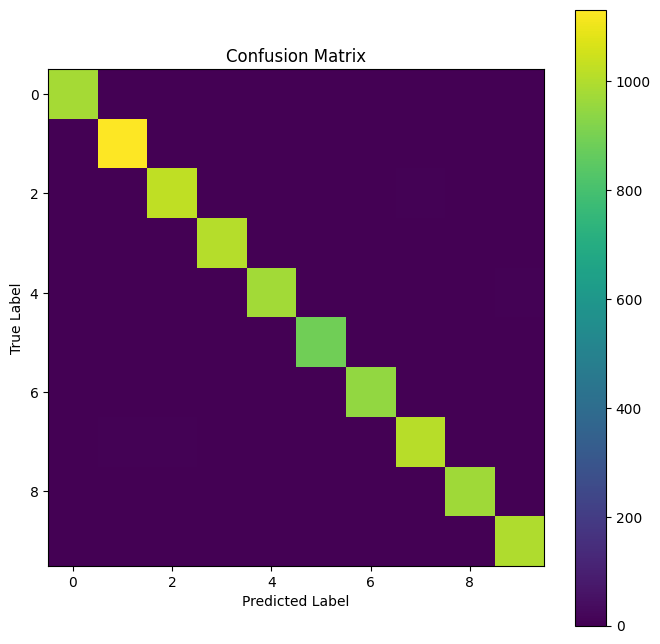

In [16]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

y_pred_probabilities = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

print("Example Predictions:")
print("True Labels:", y_test[:10])
print("Predicted Probabilities:", y_pred_probabilities[:10])
print("Predicted Classes:", y_pred_classes[:10])

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

conf_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 8))
plt.imshow(conf_mat, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()